In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('nhldraft.csv')

In [22]:
df.head()

,id,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,games_played,goals,assists
0,1,2022,1,Montreal Canadiens,Juraj Slafkovsky,SK,LW,18.0,NaN,TPS (Finland),NaN,NaN,NaN
1,2,2022,2,New Jersey Devils,Simon Nemec,SK,D,18.0,NaN,HK Nitra (Slovakia),NaN,NaN,NaN
2,3,2022,3,Arizona Coyotes,Logan Cooley,US,C,18.0,NaN,USA U-18 Development Team (USDP/USHL),NaN,NaN,NaN
3,4,2022,4,Seattle Kraken,Shane Wright,CA,C,18.0,NaN,Kingston Frontenacs (OHL),NaN,NaN,NaN
4,5,2022,5,Philadelphia Flyers,Cutter Gauthier,SE,LW,18.0,NaN,USA U-18 Development Team (USDP/USHL),NaN,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12250 non-null  int64  
 1   year          12250 non-null  int64  
 2   overall_pick  12250 non-null  int64  
 3   team          12249 non-null  object 
 4   player        12250 non-null  object 
 5   nationality   12246 non-null  object 
 6   position      12223 non-null  object 
 7   age           8291 non-null   float64
 8   to_year       5246 non-null   float64
 9   amateur_team  12250 non-null  object 
 10  games_played  5246 non-null   float64
 11  goals         5246 non-null   float64
 12  assists       5246 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 1.2+ MB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,12250.0,6125.500000,3536.414733,1.0,3063.25,6125.5,9187.75,12250.0
year,12250.0,1996.250122,14.733847,1963.0,1984.00,1996.0,2008.00,2022.0
overall_pick,12250.0,116.633143,72.030642,1.0,55.00,112.0,174.00,293.0
age,8291.0,18.675793,1.328110,16.0,18.00,18.0,19.00,37.0
to_year,5246.0,2004.222074,14.303401,1968.0,1993.00,2006.0,2017.75,2022.0
games_played,5246.0,305.384102,346.748283,1.0,25.00,151.5,521.00,1779.0
goals,5246.0,50.858940,94.060512,0.0,0.00,9.0,56.00,780.0
assists,5246.0,85.037743,144.246996,0.0,2.00,18.0,107.00,1249.0


In [25]:
df.isna().sum()

id                 0
year               0
overall_pick       0
team               1
player             0
nationality        4
position          27
age             3959
to_year         7004
amateur_team       0
games_played    7004
goals           7004
assists         7004
dtype: int64

In [26]:
df.columns

Index(['id', 'year', 'overall_pick', 'team', 'player', 'nationality',
       'position', 'age', 'to_year', 'amateur_team', 'games_played', 'goals',
       'assists'],
      dtype='object')

In [27]:
df.drop(df.columns[[0]],axis = 1,inplace = True)

In [28]:
df.columns

Index(['year', 'overall_pick', 'team', 'player', 'nationality', 'position',
       'age', 'to_year', 'amateur_team', 'games_played', 'goals', 'assists'],
      dtype='object')

In [29]:
df.duplicated().sum()

0

In [32]:
df.isna().sum()

year               0
overall_pick       0
team               0
player             0
nationality        0
position           0
age             3959
to_year         7004
amateur_team       0
games_played    7004
goals           7004
assists         7004
dtype: int64

In [33]:
df.dropna(subset=['to_year'],inplace = True, axis = 0)
df.isna().sum()

year            0
overall_pick    0
team            0
player          0
nationality     0
position        0
age             0
to_year         0
amateur_team    0
games_played    0
goals           0
assists         0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5246 entries, 225 to 12249
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5246 non-null   int64  
 1   overall_pick  5246 non-null   int64  
 2   team          5246 non-null   object 
 3   player        5246 non-null   object 
 4   nationality   5246 non-null   object 
 5   position      5246 non-null   object 
 6   age           5246 non-null   float64
 7   to_year       5246 non-null   float64
 8   amateur_team  5246 non-null   object 
 9   games_played  5246 non-null   float64
 10  goals         5246 non-null   float64
 11  assists       5246 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 532.8+ KB


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5246.0,1994.855700,13.986632,1963.0,1983.0,1995.0,2007.00,2021.0
overall_pick,5246.0,82.908883,67.716372,1.0,27.0,64.0,126.00,291.0
age,5246.0,18.824056,1.489628,16.0,18.0,18.0,19.00,37.0
to_year,5246.0,2004.222074,14.303401,1968.0,1993.0,2006.0,2017.75,2022.0
games_played,5246.0,305.384102,346.748283,1.0,25.0,151.5,521.00,1779.0
goals,5246.0,50.858940,94.060512,0.0,0.0,9.0,56.00,780.0
assists,5246.0,85.037743,144.246996,0.0,2.0,18.0,107.00,1249.0


In [30]:
df.sample(10)

,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,games_played,goals,assists,points
8728,1986,49,Vancouver Canucks,Don Gibson,CA,D,18,1991,Winkler (MJHL),14,0,3,3
11148,1975,120,New York Rangers,Claude Larose,CA,LW,20,1980,Sherbrooke Castors (QMJHL),25,4,7,11
12087,1969,44,Montreal Canadiens,Murray Anderson,CA,D,20,1975,Flin Flon Bombers (WCHL),40,0,1,1
3422,2006,1,St. Louis Blues,Erik Johnson,US,D,18,2022,USA U-18 Development Team (USDP/NAHL),857,88,241,329
1324,2016,10,Colorado Avalanche,Tyson Jost,CA,C,18,2022,Pentiction (BCHL),342,47,62,109
5804,1998,212,San Jose Sharks,Jim Fahey,US,D,19,2007,Catholic Memorial School (High-MA),92,1,24,25
8546,1987,119,Boston Bruins,Matt Glennon,US,LW,18,1992,Archbishop Williams HS (High-MA),3,0,0,0
11504,1973,13,Chicago Blackhawks,Darcy Rota,CA,LW,20,1984,Edmonton Oil Kings (WCHL),794,256,239,495
7060,1993,203,Montreal Canadiens,Alan Letang,CA,D,18,2003,Newmarket Royals (OHL),14,0,0,0
8161,1989,238,Minnesota North Stars,Helmut Balderis,LV,RW,37,1990,Dinamo Riga (Soviet),26,3,6,9


In [31]:
df['years_played'] = df['to_year'] - df['year']
df['effectiveness'] = df['points'] / df['games_played']

In [32]:
df.head()

,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,games_played,goals,assists,points,years_played,effectiveness
225,2021,1,Buffalo Sabres,Owen Power,CA,D,18,2022,Michigan (Big Ten),8,2,1,3,1,0.375000
226,2021,2,Seattle Kraken,Matthew Beniers,US,C,18,2022,Michigan (Big Ten),10,3,6,9,1,0.900000
227,2021,3,Anaheim Ducks,Mason Mctavish,CH,C,18,2022,Peterborough Petes (OHL),9,2,1,3,1,0.333333
229,2021,5,Columbus Blue Jackets,Kent Johnson,CA,C,18,2022,Michigan (Big Ten),9,0,3,3,1,0.333333
231,2021,7,San Jose Sharks,William Eklund,SE,LW,18,2022,Djurgardens IF (Sweden),9,0,4,4,1,0.444444


Text(-2.1805555555555554, 0.5, 'Количество')

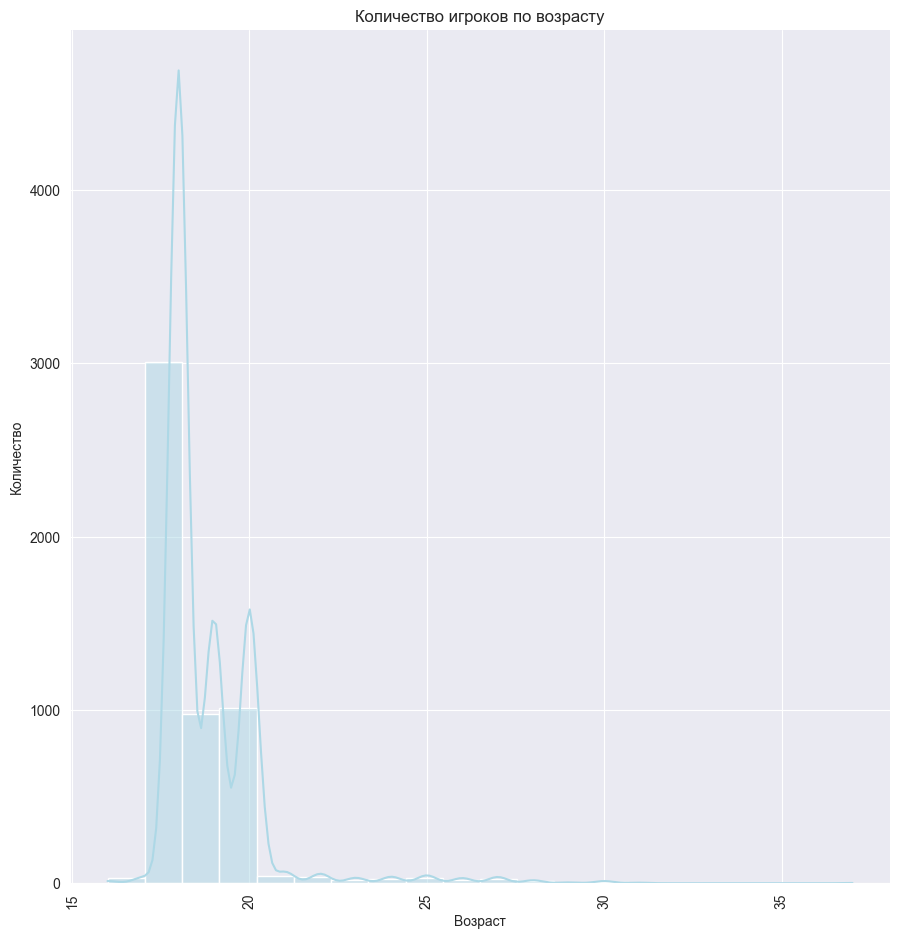

In [63]:
ax = sns.displot(data=df,x='age',color='lightblue',bins=20,kde=True)
ax.fig.set_figheight(10)
ax.fig.set_figwidth(10)
plt.xticks(rotation=90)
plt.title('Количество игроков по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')

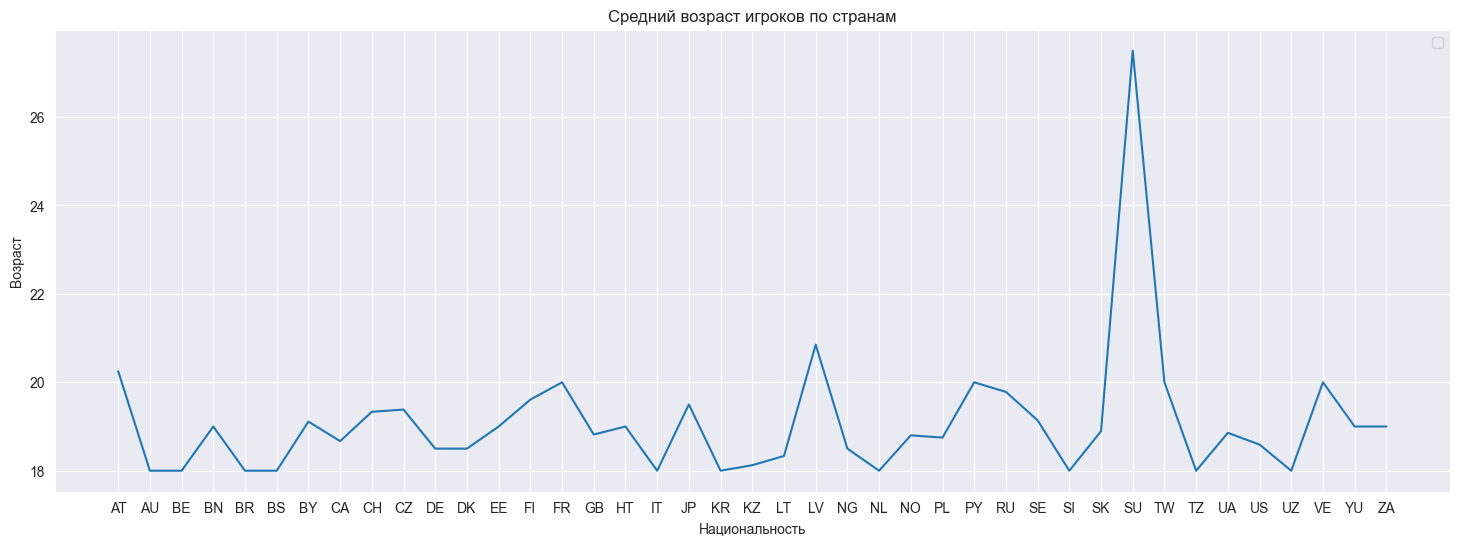

In [59]:
mean_foul = df.pivot_table(index='nationality',
                           values='age',
                           aggfunc='mean').sort_values(by='nationality')

plt.figure(figsize=(18,6))
sns.lineplot(data=mean_foul)
sns.set_style('darkgrid')
plt.title('Средний возраст игроков по странам')
plt.xlabel('Национальность')
plt.ylabel('Возраст')
plt.legend('')

Text(0, 0.5, 'Средняя эффективность')

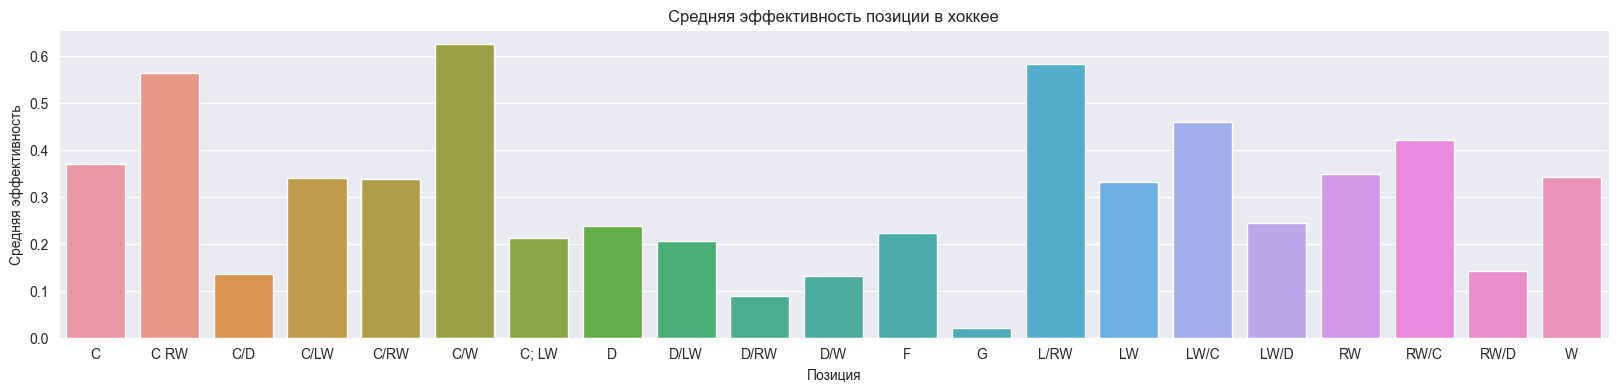

In [64]:
max_effectiveness = df.pivot_table(index='position',
                           values='effectiveness',
                           aggfunc='mean').sort_values(by='effectiveness')

plt.figure(figsize=(20,4))
sns.barplot(x=max_effectiveness.index, y=max_effectiveness['effectiveness'])
plt.title('Средняя эффективность позиции в хоккее')
plt.xlabel('Позиция')
plt.ylabel('Средняя эффективность')

array([[<AxesSubplot: xlabel='age', ylabel='age'>,
        <AxesSubplot: xlabel='points', ylabel='age'>,
        <AxesSubplot: xlabel='games_played', ylabel='age'>],
       [<AxesSubplot: xlabel='age', ylabel='points'>,
        <AxesSubplot: xlabel='points', ylabel='points'>,
        <AxesSubplot: xlabel='games_played', ylabel='points'>],
       [<AxesSubplot: xlabel='age', ylabel='games_played'>,
        <AxesSubplot: xlabel='points', ylabel='games_played'>,
        <AxesSubplot: xlabel='games_played', ylabel='games_played'>]],
      dtype=object)

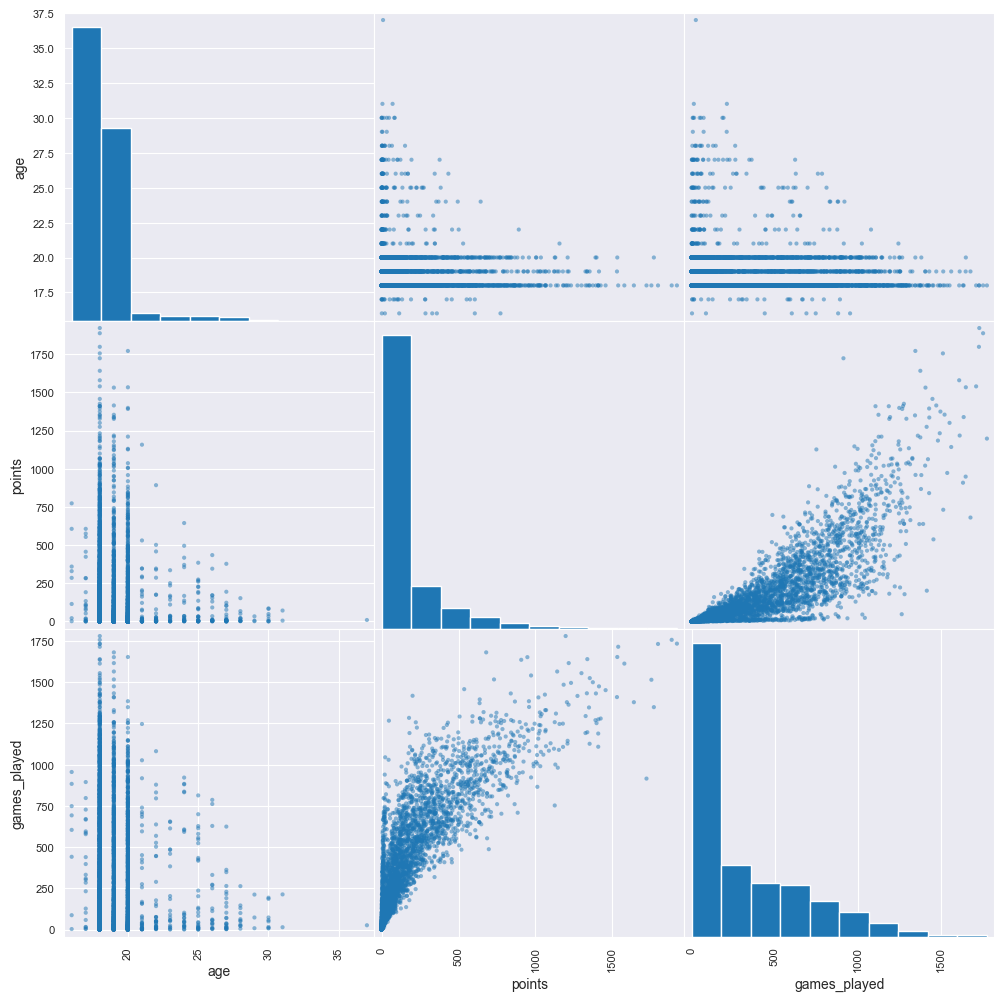

In [67]:
pd.plotting.scatter_matrix(df[['age', 'points', 'games_played']],figsize=(12,12))

<AxesSubplot: >

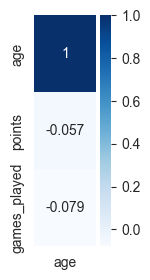

In [69]:
df_filter = df[['age', 'points', 'games_played']]
plt.figure(figsize=(1,3))
sns.heatmap(df_filter.corr()[['age']].sort_values(by='age',ascending=False),cmap='Blues',annot=True)